<a href="https://colab.research.google.com/github/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/blob/master/Calculate_invariant_mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating the invariant mass

In this example the calculation of the __invariant mass__ with the CMS open data is learned. The invariant mass is an important concept for particle physicists to find out new particles.

The following CSV files include already calculated values for invariant masses:
    - dielectron.csv
    - DoubleMuRun2011A.csv
    - Jpsimumu_Run2011A.csv
    - Ymumu_Run2011A.csv
    
For example with the files _Zmumu_\__Run2011A.csv_ and _Zee_\__Run2011A.csv_ it is easy to calculate the values of the invariant masses. Let's start the calculation by importing the needed Python modules and getting the data. In this example we will use the file _Zmumu_\__Run2011A.csv_ which includes collision events selected from the primary dataset [1] with the specific selection criteria [2].

<br>
<br>
[1]  CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).
<br>
[2] Thomas McCauley (2016). Zmumu. Jupyter Notebook file. https://github.com/tpmccauley/cmsopendata-jupyter/blob/hst-0.1/Zmumu.ipynb.

### Getting the data

In [0]:
# Import the needed modules. Pandas is for the data-analysis and numpy for scientific calculation.
# Name these to "pd" and "np".
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a new DataFrame structure from the file "Zmumu_Run2011A.csv". Name it as "dataset".
dataset = pd.read_csv('Zmumu_Run2011A.csv')

We can check the content that we saved to the variable _dataset_ by printing the 5 first rows with the following code:

In [0]:
dataset.head()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.432396,2.574210,1,-0.074544,0.499921,34.2464,-0.988480,-0.498704,-1,0.071222,3.42214
1,165617,75138253,24.5872,-2.052200,2.866570,-1,-0.055437,0.000000,28.5389,0.385163,-1.991170,1,0.051477,0.00000
2,165617,75887636,31.7386,-2.259450,-1.332290,-1,0.087917,0.000000,30.2344,-0.468419,1.883310,1,-0.087639,0.00000
3,165617,75779415,39.7394,-0.712338,-0.312266,1,0.058481,0.000000,48.2790,-0.195625,2.970320,-1,-0.049201,0.00000
4,165617,75098104,41.2998,-0.157055,-3.040770,1,-0.030463,1.228040,43.4508,0.590958,-0.042756,-1,0.044175,0.00000


### Performing the calculation

Let's use the following expression for the invariant mass $M$ in the calculation:

$$M = \sqrt{2p_{T1}p_{T2}(\cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2))}.$$

In the expression $p_T$ is the component of the momentum which is perpendicular to the beam axis, $\eta$ is the pseudorapidity (angle) and $\phi$ the azimuthal angle.

In the calculation below we will use the _numpy_ module which was named as _np_ in the first code cell. With _numpy_ it is possible to use mathematical commands like _sqrt_ and _cosh_ by calling first the name of the module (_np_) and then the command separated by a dot. So for example the square root could be called by writing _np.sqrt( )_.

The _pt1_, _pt2_, _eta1_, _eta2_, _phi1_ and _phi2_ refer to the columns of the data. In the code it has to be told from where the values will be taken. So for example if you want to get the column _pt1_, you have to write _dataset.pt1_ in the code.

Now we are ready to calculate the values of the invariant masses for the different events. _Numpy_ will automatically calculate the values for all of the events when we give the calculation in the following form. So the equation given is calculated for all of the rows.

In [0]:
invariant_mass = np.sqrt(2*dataset.pt1*dataset.pt2*(np.cosh(dataset.eta1-dataset.eta2) - np.cos(dataset.phi1-dataset.phi2)))

After the calculation we can check which values were saved in the variable _invariant_\__mass_ by printing the content of the variable:

In [0]:
print(invariant_mass)

0        89.885744
1        88.810987
2        88.472502
3        90.332620
4        90.514507
           ...    
10578    90.610799
10579    89.744873
10580    90.714366
10581    91.945212
10582    87.838121
Length: 10583, dtype: float64


If you wish to add calculated values as a new column to your data set see an example [here](https://github.com/cms-opendata-education/cms-jupyter-materials-english/blob/master/Introduction-to-jupyter/Add-column-to-dataframe.ipynb).

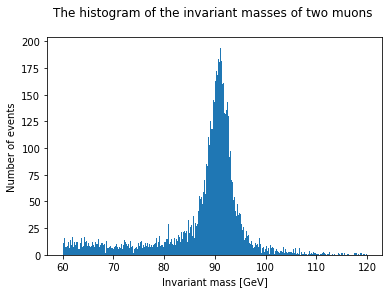

In [0]:
# Plot the histogram with the function hist() of the matplotlib.pyplot module:
# (http://matplotlib.org/api/pyplot_api.html?highlight=matplotlib.pyplot.hist#matplotlib.pyplot.hist).
# 'Bins' determines the number of the bins used.
plt.hist(invariant_mass, bins=500)

# Name the axises and give the title.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('The histogram of the invariant masses of two muons \n') # \n creates a new line for making the title look better

# Show the plot.
plt.show()